### Importing Libraries

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
data.shape

(10000, 6)

In [11]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [14]:
#check for missing values
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

There are no null values , which is a good thing. Reduced work-load for data cleaning.

### Data Analysis

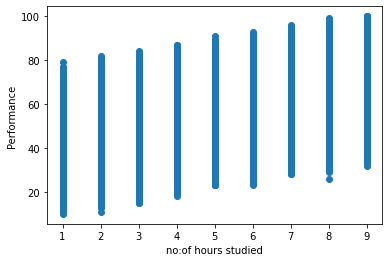

In [16]:
#Scatter plot to understand performace index vs hours studied
plt.scatter(data['Hours Studied'],data['Performance Index'])
plt.xlabel('no:of hours studied')
plt.ylabel('Performance')
plt.show()

We can see the performace index increasing with the hours spent to study. (Positive Relation)

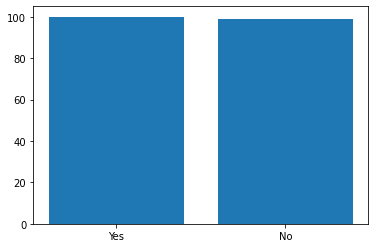

In [22]:
#students involved and not involved in extracurricular activities are almost equal
plt.bar(data['Extracurricular Activities'],data['Performance Index'])
plt.show()

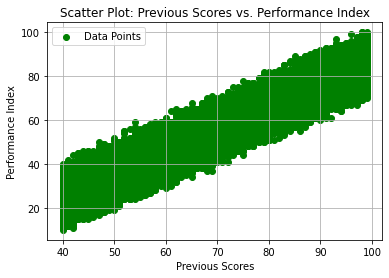

In [27]:
# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot
plt.scatter(df['Previous Scores'], df['Performance Index'], c='green', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatter Plot: Previous Scores vs. Performance Index')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

Students with good scores previously have a better performance index

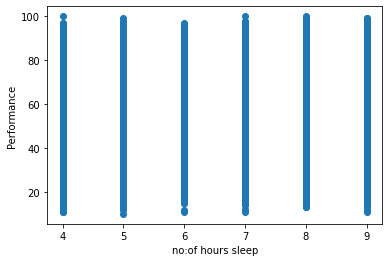

In [24]:
#Scatter plot to understand performace index vs hours slept
plt.scatter(data['Sleep Hours'],data['Performance Index'])
plt.xlabel('no:of hours sleep')
plt.ylabel('Performance')
plt.show()

Doesn't show much effect on performace

Text(0, 0.5, 'Performance Index')

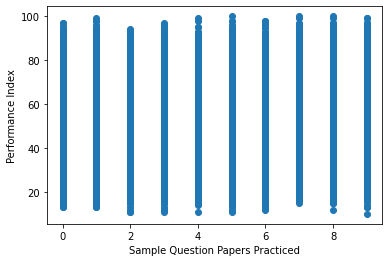

In [29]:
#Is doing sample paper necessary??
plt.scatter(data['Sample Question Papers Practiced'],data['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')

In [34]:
#How many hours did students spend for sleep in avg taking from top 20
df=data.tail(20)
df['Sleep Hours'].sum()//20

6

### Model Building

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import preprocessing

In [41]:
#Label Encoding

label_encoder = preprocessing.LabelEncoder()
df['Extracurricular Activities']= label_encoder.fit_transform(df['Extracurricular Activities'])

/var/folders/dp/vc53f6v51nb4jrksl7zrkl880000gn/T/ipykernel_33909/849883336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Extracurricular Activities']= label_encoder.fit_transform(df['Extracurricular Activities'])


In [43]:
#splitting the dataset

x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=30)


In [44]:
# taringin model

# Function to evaluate model performance
def evaluate_model(true, predicted):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(true, predicted)
    
    # Calculate Root Mean Squared Error (RMSE)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    
    # Calculate R-squared (R2) score
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

# Create a dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "k-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=0),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor()
}

# Loop through each model and evaluate its performance
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on both the training and testing datasets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate the model on the training dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # Evaluate the model on the testing dataset
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Display model performance metrics
    print(f"Model: {model_name}")
    
    print("Model Performance for Training set:")
    print('Root Mean Squared Error:', model_train_rmse)
    print("Mean Absolute Error:", model_train_mae)
    print("R2 Score:", model_train_r2)

    print("-----------------------------------------------------------")
    
    print("Model Performance for Testing set:")
    print('Root Mean Squared Error:', model_test_rmse)
    print('Mean Absolute Error:', model_test_mae)
    print('R2 Score:', model_test_r2)
    print()


Model: Linear Regression
Model Performance for Training set:
Root Mean Squared Error: 1.1183477638537087
Mean Absolute Error: 0.8901839859654757
R2 Score: 0.9974121683538462
-----------------------------------------------------------
Model Performance for Testing set:
Root Mean Squared Error: 0.7733578771153784
Mean Absolute Error: 0.689422269657347
R2 Score: 0.9992896883538047

Model: Lasso
Model Performance for Training set:
Root Mean Squared Error: 1.65763027419797
Mean Absolute Error: 1.2572063925727026
R2 Score: 0.9943146446840788
-----------------------------------------------------------
Model Performance for Testing set:
Root Mean Squared Error: 1.7730441065267655
Mean Absolute Error: 1.5149107557218475
R2 Score: 0.9962664068839795

Model: Ridge
Model Performance for Training set:
Root Mean Squared Error: 1.1360983423014124
Mean Absolute Error: 0.8973203136873347
R2 Score: 0.9973293675334219
-----------------------------------------------------------
Model Performance for Testi

Linear Regression and ridge regression have the highest accuracy